# Example usage

To use `reject` in a project:

In [15]:
import reject
from reject.reject import ClassificationRejector
from reject.utils import generate_synthetic_output

In [16]:
print(reject.__version__)

0.1.0


## Generate synthetic NN output

In [5]:
NUM_SAMPLES = 10
NUM_OBSERVATIONS = 1000
NUM_CLASSES = 10

y_pred_all, y_true_all = generate_synthetic_output(NUM_SAMPLES, NUM_OBSERVATIONS, NUM_CLASSES)

## `ClassificationRejector`

### Object creation

In [19]:
rej = ClassificationRejector(y_true_all, y_pred_all)

### `reject` method

In [20]:
# implement single rejection point
rej.reject(threshold=0.5, unc_type="TU", relative=True, show=True)

             Non-rejected    Rejected
---------  --------------  ----------
Correct               506           4
Incorrect             494         996

  Non-rejected accuracy    Classification quality    Rejection quality
-----------------------  ------------------------  -------------------
                 0.5060                    0.7510              85.2282


(0.506, 0.751, 85.2281879194631)

### `plot` method

Specific `unc_type` and `metric`, relative rejection

Figure(450x300)


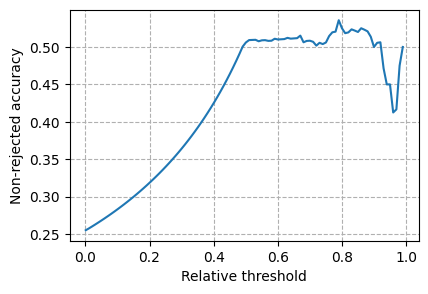

In [21]:
fig = rej.plot(unc_type="TU", metric="NRA")
print(fig)

Specific `unc_type` and `metric`, absolute rejection

Figure(450x300)


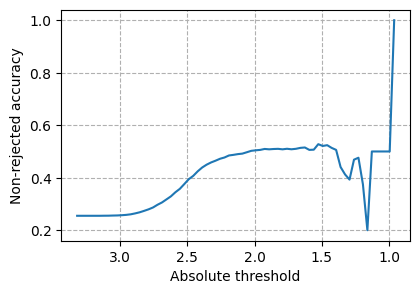

In [22]:
fig = rej.plot(unc_type="TU", metric="NRA", relative=False)
print(fig)

Specific `unc_type` for all three `metric`s, absolute rejection

Figure(1600x300)


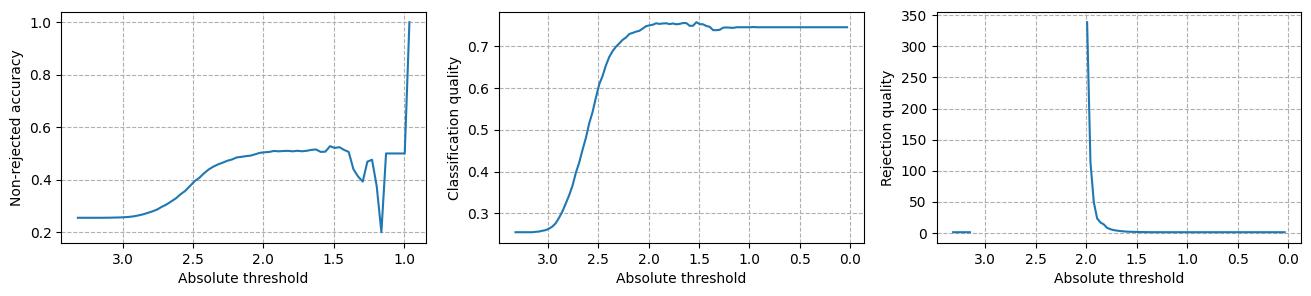

In [23]:
fig = rej.plot(unc_type="TU", metric=None, relative=False)
print(fig)

Specific `metric` on all three `unc_type`s, absolute rejection

Figure(1600x300)


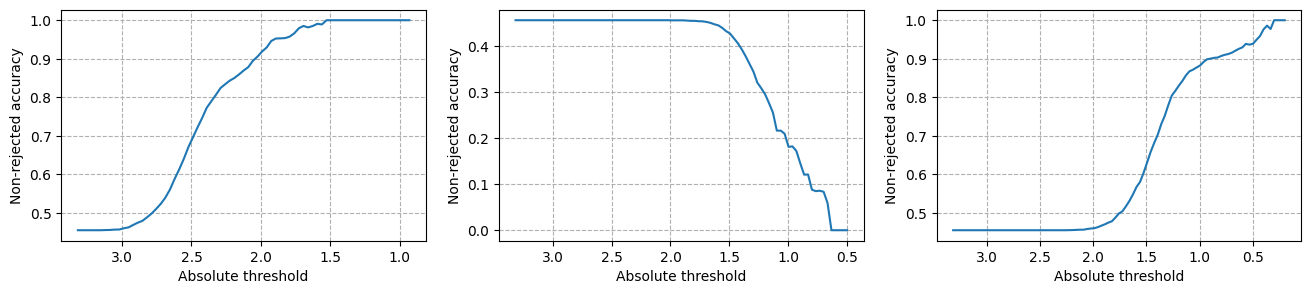

In [14]:
fig = rej.plot(unc_type=None, metric="NRA", relative=False)
print(fig)